In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("loan.csv")
df.head(2)

C:\Users\Kave\AppData\Local\Temp\ipykernel_10000\4252671677.py:3: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


[Text(0, 0.5, '(%)')]

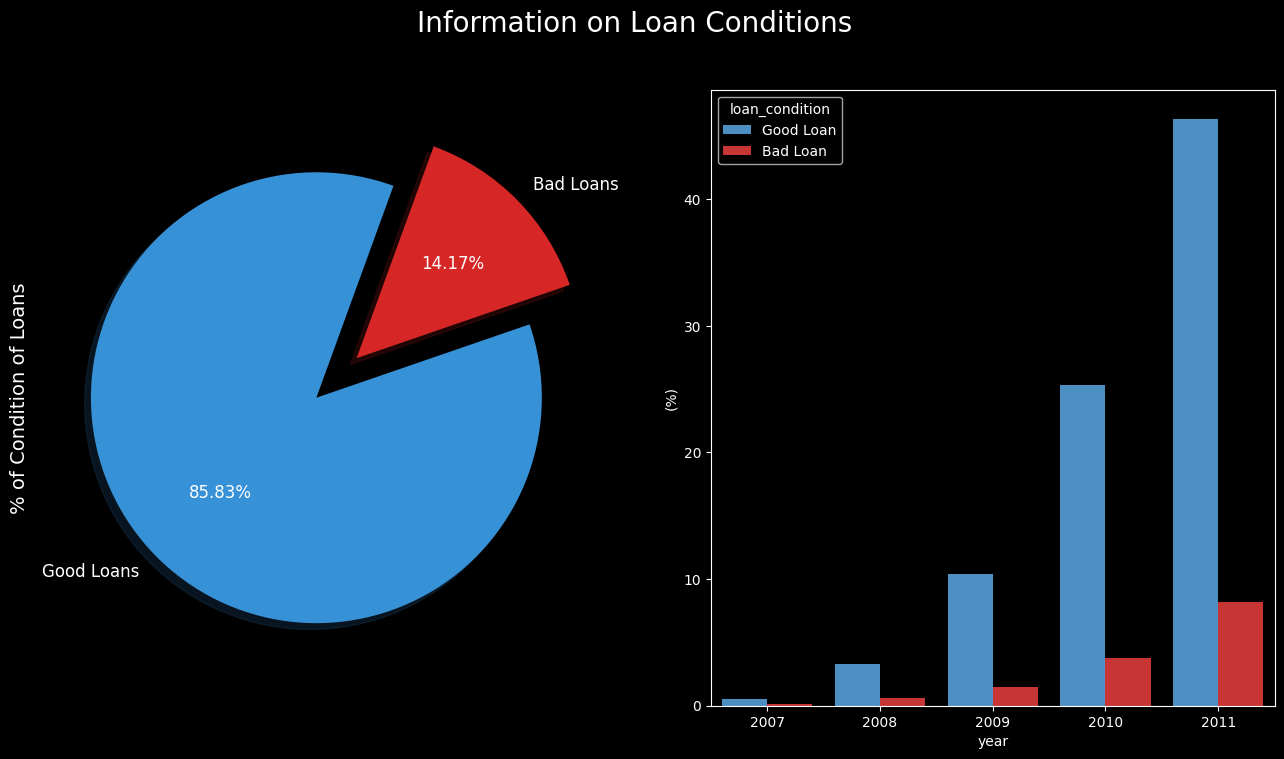

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"
plt.suptitle('Information on Loan Conditions', fontsize=20)
df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
palette = ["#3791D7", "#E01E1B"]
sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

process_issue_date done


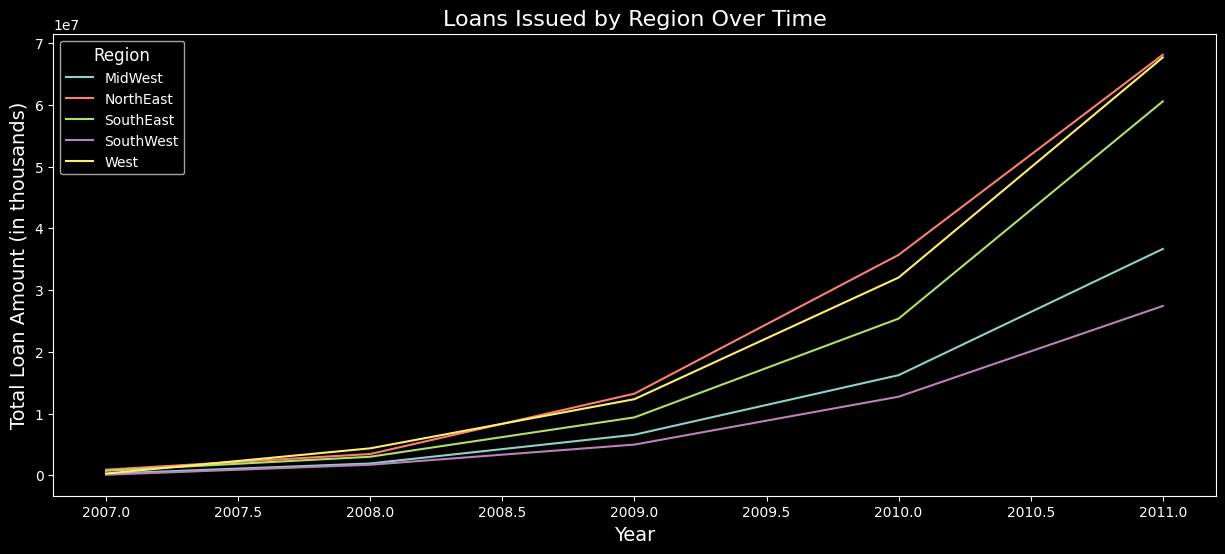

In [38]:
processed_df = preprocessor.process_issue_date(df)

# Group by 'issue_year' and 'region', summing loan_amount
by_issued_amount = processed_df.groupby(['issue_year', 'region'])['loan_amount'].sum()

# Unstack to pivot 'region' as columns for plotting
by_issued_amount.unstack().plot(kind='line', colormap=cmap, figsize=(15, 6))

plt.title('Loans Issued by Region Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Loan Amount (in thousands)', fontsize=14)
plt.legend(title='Region', title_fontsize='large', fontsize='medium', loc='upper left')
plt.grid(False)  # Disable grid

plt.show()

Text(0.5, 1.0, 'Type of Loans by Sub-Grade')

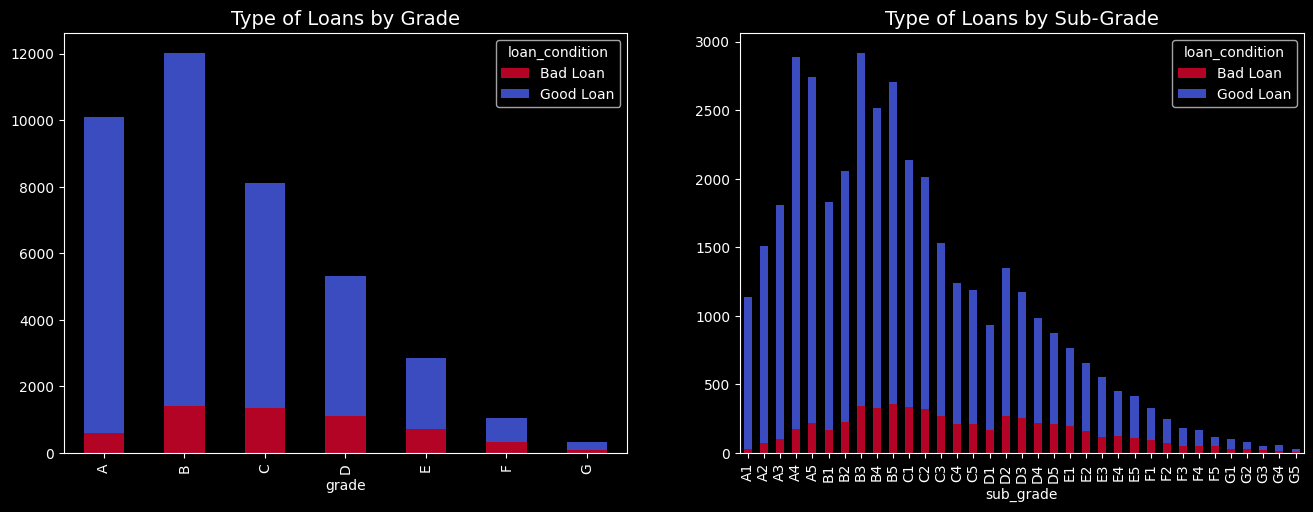

In [50]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
cmap = plt.cm.coolwarm_r
loans_by_region = df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)
loans_by_grade = df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)


C:\Users\Kave\AppData\Local\Temp\ipykernel_14600\3543429336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='loan_amount', data=df, palette='tab10')


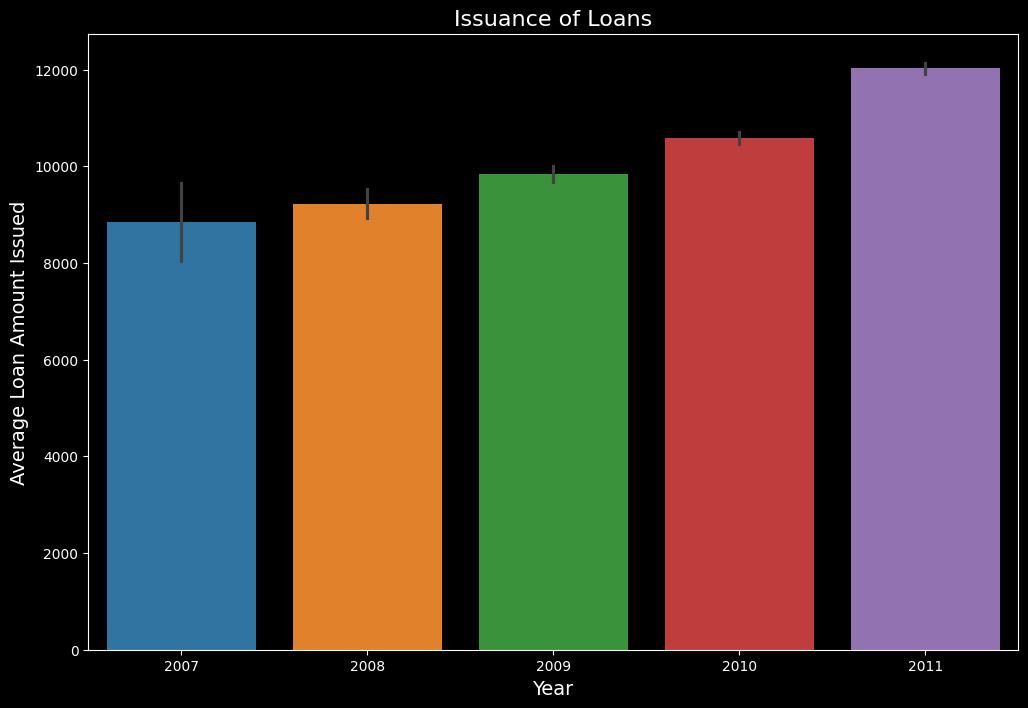

In [54]:
plt.figure(figsize=(12, 8))

# Use seaborn's barplot to visualize the average loan amount per year
sns.barplot(x='year', y='loan_amount', data=df, palette='tab10')

# Set plot title and axis labels
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Loan Amount Issued', fontsize=14)

# Show the plot
plt.show()

In [24]:
def remove_percent_symbol(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace('%', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

df= remove_percent_symbol(df)
print(df.dtypes)
print(df.head())

loan_amount         int64
funded_amount       int64
investor_funds    float64
term              float64
interest_rate     float64
                   ...   
year                int32
region            float64
issue_year          int32
issue_month         int32
emp_length_int    float64
Length: 113, dtype: object
   loan_amount  funded_amount  investor_funds  term  interest_rate  \
0         5000           5000          4975.0   NaN          10.65   
1         2500           2500          2500.0   NaN          15.27   
2         2400           2400          2400.0   NaN          15.96   
3        10000          10000         10000.0   NaN          13.49   
4         3000           3000          3000.0   NaN          12.69   

   installment  grade  sub_grade  emp_length  home_ownership  ...  \
0       162.87    NaN        NaN         NaN             NaN  ...   
1        59.83    NaN        NaN         NaN             NaN  ...   
2        84.33    NaN        NaN         NaN             Na

In [25]:
df.interest_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: interest_rate, Length: 39717, dtype: float64

In [26]:
import pandas as pd
df=pd.read_csv("loan.csv")
def remove_percent_symbol(df):
    if any(df[col].dtype == 'object' and df[col].str.contains('%').any() for col in df.columns):
        for col in df.columns:
            if df[col].dtype == 'object' and df[col].str.contains('%').any():
                df[col] = df[col].str.replace('%', '', regex=False)
                df[col] = pd.to_numeric(df[col], errors='coerce')
        print("'%'' symbols removed and columns converted to numeric where applicable.")
    else:
        print("No columns contain '%' symbols. No action performed.")

    return df

df= remove_percent_symbol(df)

# Inspect the DataFrame to confirm the changes
print(df.dtypes)
print(df.head())

C:\Users\Kave\AppData\Local\Temp\ipykernel_16012\1773285215.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("loan.csv")


'%'' symbols removed and columns converted to numeric where applicable.
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 114, dtype: object
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  i

In [3]:
class Preprocessor:
    def preprocess(self, df):
        df = self.fill_missing_values(df)
        df = self.rename_columns(df)
        df = self.drop_columns(df)
        df=self.process_issue_year(df)
        df=self.loan(df)
        df=self.state_con(df)
        df=self.process_issue_date(df)
        df=self.con_emp_len(df)
        df=self.remove_percent_symbol(df)

        return df
    
    def fill_missing_values(self, df):
        if df.isnull().any().any():
            df.fillna(0, inplace=True)
        print("Missing value done")
        return df
    
    def rename_columns(self, df):
        column_mapping = {
            "loan_amnt": "loan_amount",
            "funded_amnt": "funded_amount",
            "funded_amnt_inv": "investor_funds",
            "int_rate": "interest_rate",
            "annual_inc": "annual_income"
        }
        columns_to_rename = list(set(df.columns) & set(column_mapping.keys()))
        df.rename(columns={col: column_mapping[col] for col in columns_to_rename}, inplace=True)
        print("rename_columns done")
        return df
    
    def drop_columns(self, df):
        columns_to_drop = ['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title']
        existing_columns_to_drop = list(set(columns_to_drop) & set(df.columns))
        df.drop(existing_columns_to_drop, axis=1, inplace=True)
        print("drop_columns done")
        return df
     
    def process_issue_year(self, df):
        if 'issue_d' in df.columns:
            missing_values = df['issue_d'].isnull().sum()
            if missing_values > 0:
                df['issue_d'] = df['issue_d'].fillna('')
            try:
                df['issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
            except ValueError:
                print("Error: Unable to parse 'issue_d' column. Check for invalid datetime formats.")
            try:
                df['year'] = df['issue_date'].dt.year
            except KeyError:
                print("Error: 'issue_date' column not found. Make sure datetime parsing was successful.")

            print(df[['issue_d', 'year']].head())
        else:
            print("Error: 'issue_d' column not found in DataFrame.")
        print("process_issue_year done")
        return df

    def loan(self,df):
        if 'loan_status' in df.columns:
            bad_loan = [
                "Charged Off", 
                "Default", 
                "Does not meet the credit policy. Status:Charged Off", 
                "In Grace Period", 
                "Late (16-30 days)", 
                "Late (31-120 days)"
            ]
            df['loan_condition'] = np.nan
            def loan_condition(status):
                if status in bad_loan:
                    return 'Bad Loan'
                else:
                    return 'Good Loan'
            df['loan_condition'] = df['loan_status'].apply(loan_condition)
        else:
            print("Error: 'loan_status' column not found in DataFrame. Unable to apply loan condition.")
        print("loan status done")

        return df
    def state_con(self,df):
        if 'addr_state' in df.columns:
            states = df['addr_state'].unique()
            west = ['CA', 'OR', 'UT', 'WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
            south_west = ['AZ', 'TX', 'NM', 'OK']
            south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN']
            mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
            north_east = ['CT', 'NY', 'PA', 'NJ', 'RI', 'MA', 'MD', 'VT', 'NH', 'ME']
            df['region'] = np.nan
            def finding_regions(state):
                if state in west:
                    return 'West'
                elif state in south_west:
                    return 'SouthWest'
                elif state in south_east:
                    return 'SouthEast'
                elif state in mid_west:
                    return 'MidWest'
                elif state in north_east:
                    return 'NorthEast'
            df['region'] = df['addr_state'].apply(finding_regions)
        else:
            print("Error: 'addr_state' column not found in DataFrame. Unable to create regions.")
        print("state_conversion done")
        return df
    def process_issue_date(self, df):
        if 'issue_d' in df.columns:
            try:
                df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y', errors='coerce')
                invalid_dates = df[df['issue_d'].isnull()]['issue_d']
                if not invalid_dates.empty:
                    print(f"Invalid date strings found:\n{invalid_dates}")

                df['issue_year'] = df['issue_d'].dt.year
                df['issue_month'] = df['issue_d'].dt.month

                grouped_yearly = df.groupby(['issue_year', 'region'], as_index=False)['loan_amount'].sum()
                grouped_monthly = df.groupby(['issue_month', 'region'], as_index=False)['loan_amount'].sum()

                df_dates = pd.DataFrame(data=grouped_yearly[['issue_year', 'region', 'loan_amount']])
                df_dates['loan_amount'] = df_dates['loan_amount'] / 1000

                print(df_dates)

            except ValueError:
                print("Error: Unable to parse 'issue_d' column. Check for invalid datetime formats.")
        else:
            print("Error: 'issue_d' column not found in DataFrame. Unable to process dates.")
        print("process_issue_date done")

        return df
    def con_emp_len(self, df):
        if df is None:
            print("Error: DataFrame 'df' is None. Unable to process employment length.")
            return df
        employment_length_mapping = {
            '10+ years': 10,
            '< 1 year': 0.5,
            '1 year': 1,
            '2 years': 2,
            '3 years': 3,
            '4 years': 4,
            '5 years': 5,
            '6 years': 6,
            '7 years': 7,
            '8 years': 8,
            '9 years': 9,
            'n/a': 0
        }

        try:
            df['emp_length_int'] = np.nan
            df['emp_length_int'] = df['emp_length'].map(employment_length_mapping)
            print("Employment length conversion done.")
        except Exception as e:
            print(f"Error occurred during employment length conversion: {str(e)}")
        return df
    def remove_percent_symbol(self,df):
        if any(df[col].dtype == 'object' and df[col].str.contains('%').any() for col in df.columns):
            for col in df.columns:
                if df[col].dtype == 'object' and df[col].str.contains('%').any():
                    df[col] = df[col].str.replace('%', '', regex=False)
                    df[col] = pd.to_numeric(df[col], errors='coerce')
            print("'%'' symbols removed and columns converted to numeric where applicable.")
        else:
            print("No columns contain '%' symbols. No action performed.")
        print("symbol removed")

        return df
    
preprocessor = Preprocessor()
processed_df = preprocessor.preprocess(df)
print(processed_df)

Missing value done
rename_columns done
drop_columns done
  issue_d  year
0  Dec-11  2011
1  Dec-11  2011
2  Dec-11  2011
3  Dec-11  2011
4  Dec-11  2011
process_issue_year done
loan status done
state_conversion done
    issue_year     region  loan_amount
0         2007    MidWest      249.450
1         2007  NorthEast      900.550
2         2007  SouthEast      720.900
3         2007  SouthWest       81.800
4         2007       West      266.575
5         2008    MidWest     1903.025
6         2008  NorthEast     3437.950
7         2008  SouthEast     2993.600
8         2008  SouthWest     1697.175
9         2008       West     4358.525
10        2009    MidWest     6561.225
11        2009  NorthEast    13216.800
12        2009  SouthEast     9372.000
13        2009  SouthWest     4963.625
14        2009       West    12322.675
15        2010    MidWest    16215.250
16        2010  NorthEast    35704.925
17        2010  SouthEast    25376.525
18        2010  SouthWest    12721.925
19  

In [29]:
df.interest_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: interest_rate, Length: 39717, dtype: float64

C:\Users\Kave\AppData\Local\Temp\ipykernel_10000\3853258189.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




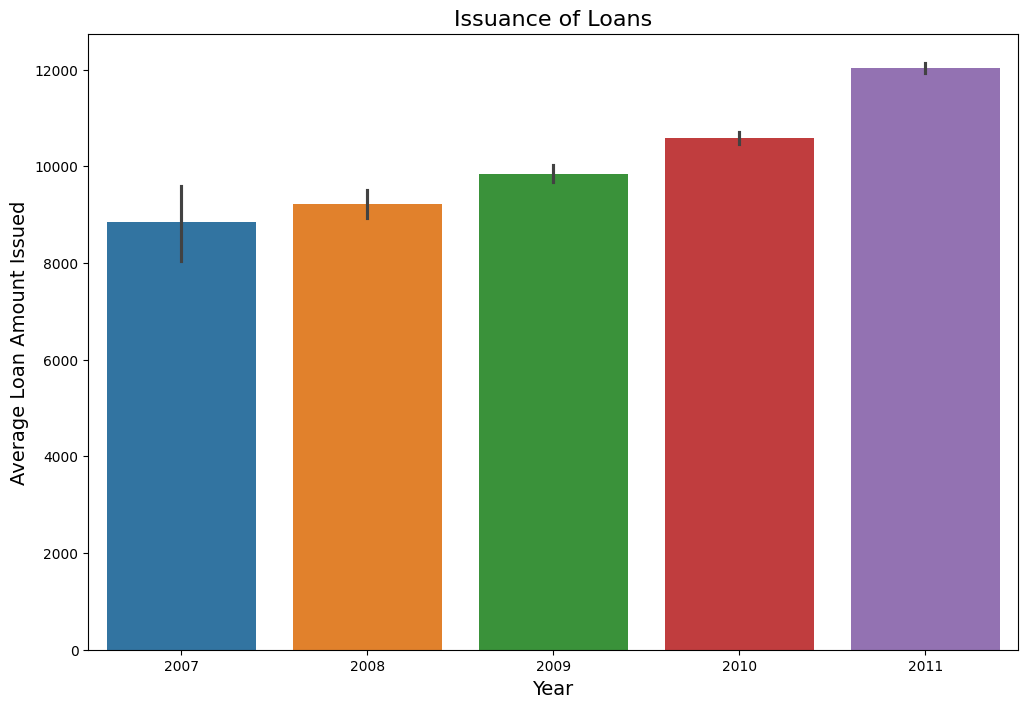

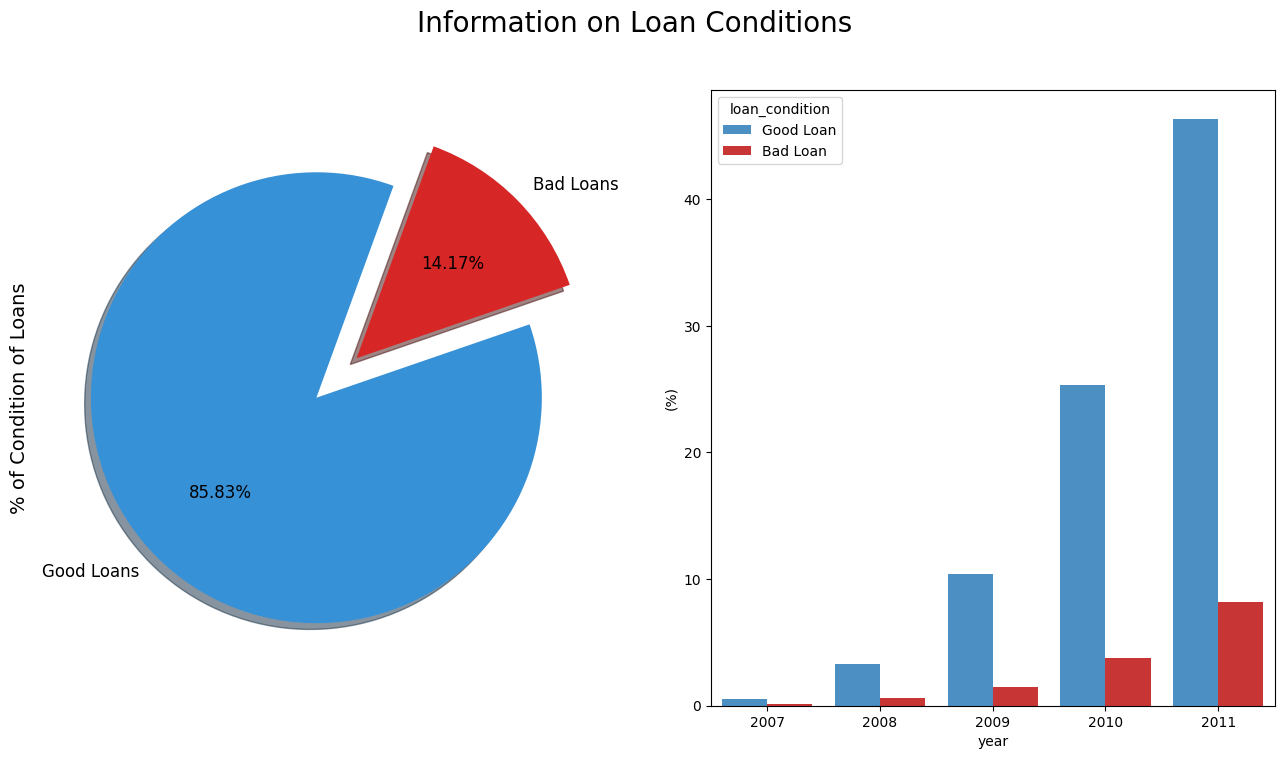

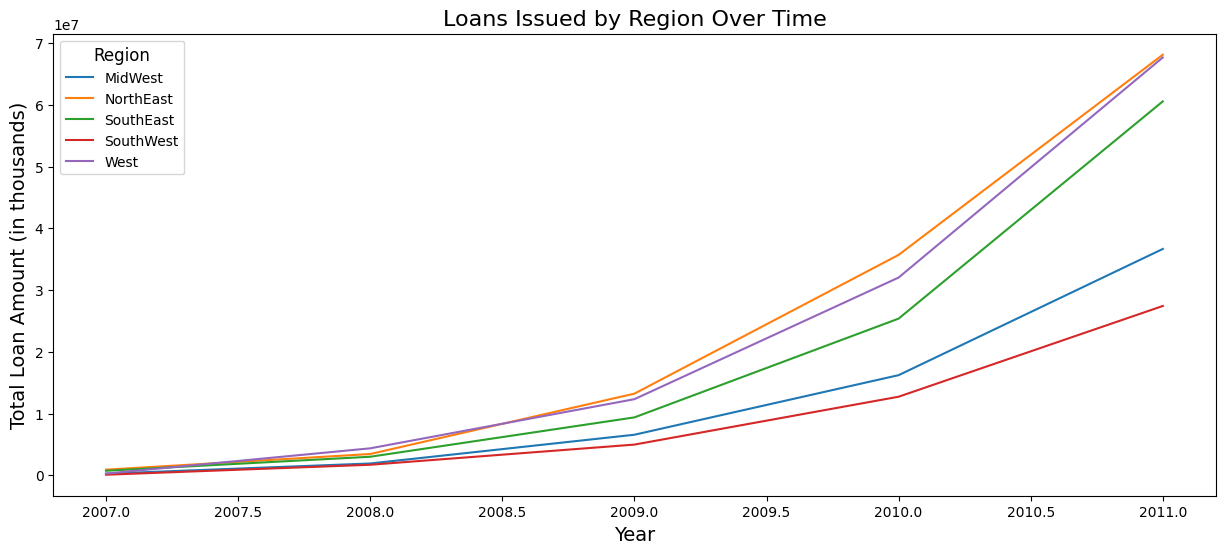

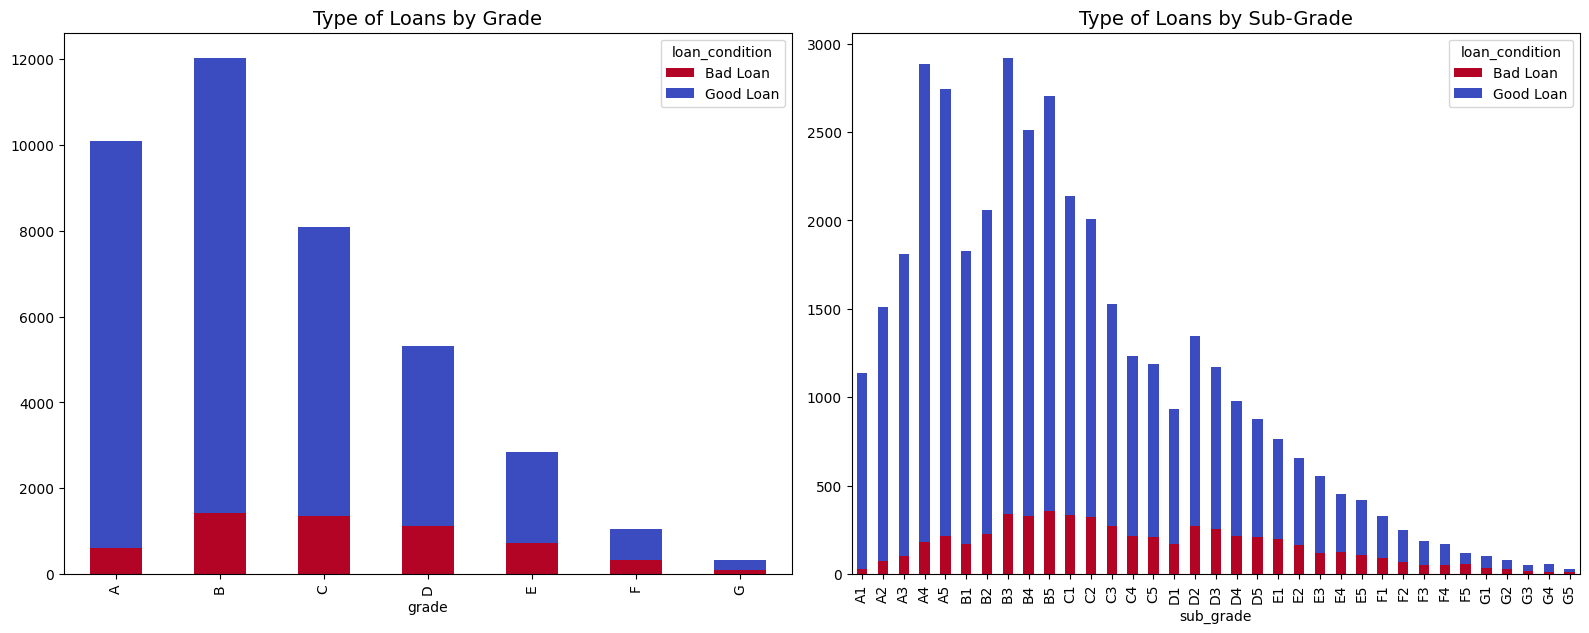

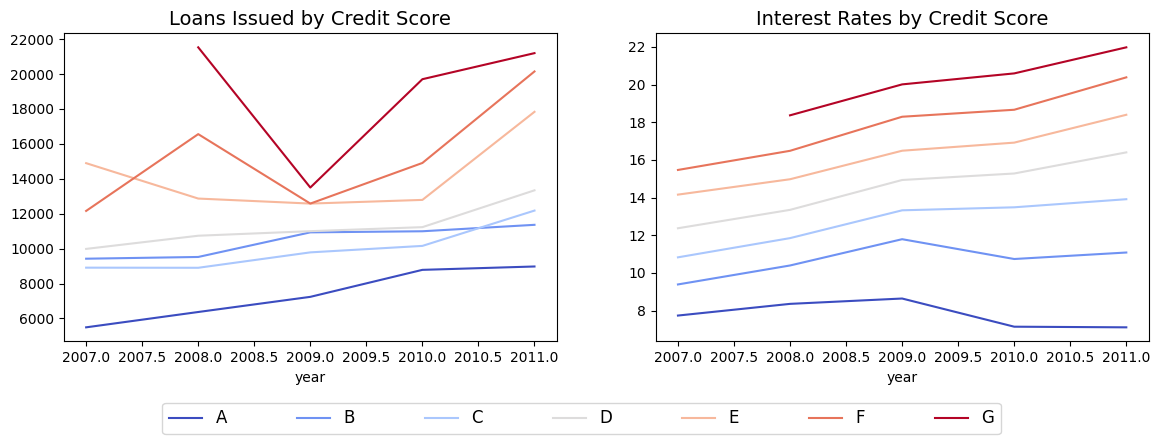

C:\Users\Kave\AppData\Local\Temp\ipykernel_10000\3853258189.py:134: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Kave\AppData\Local\Temp\ipykernel_10000\3853258189.py:135: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




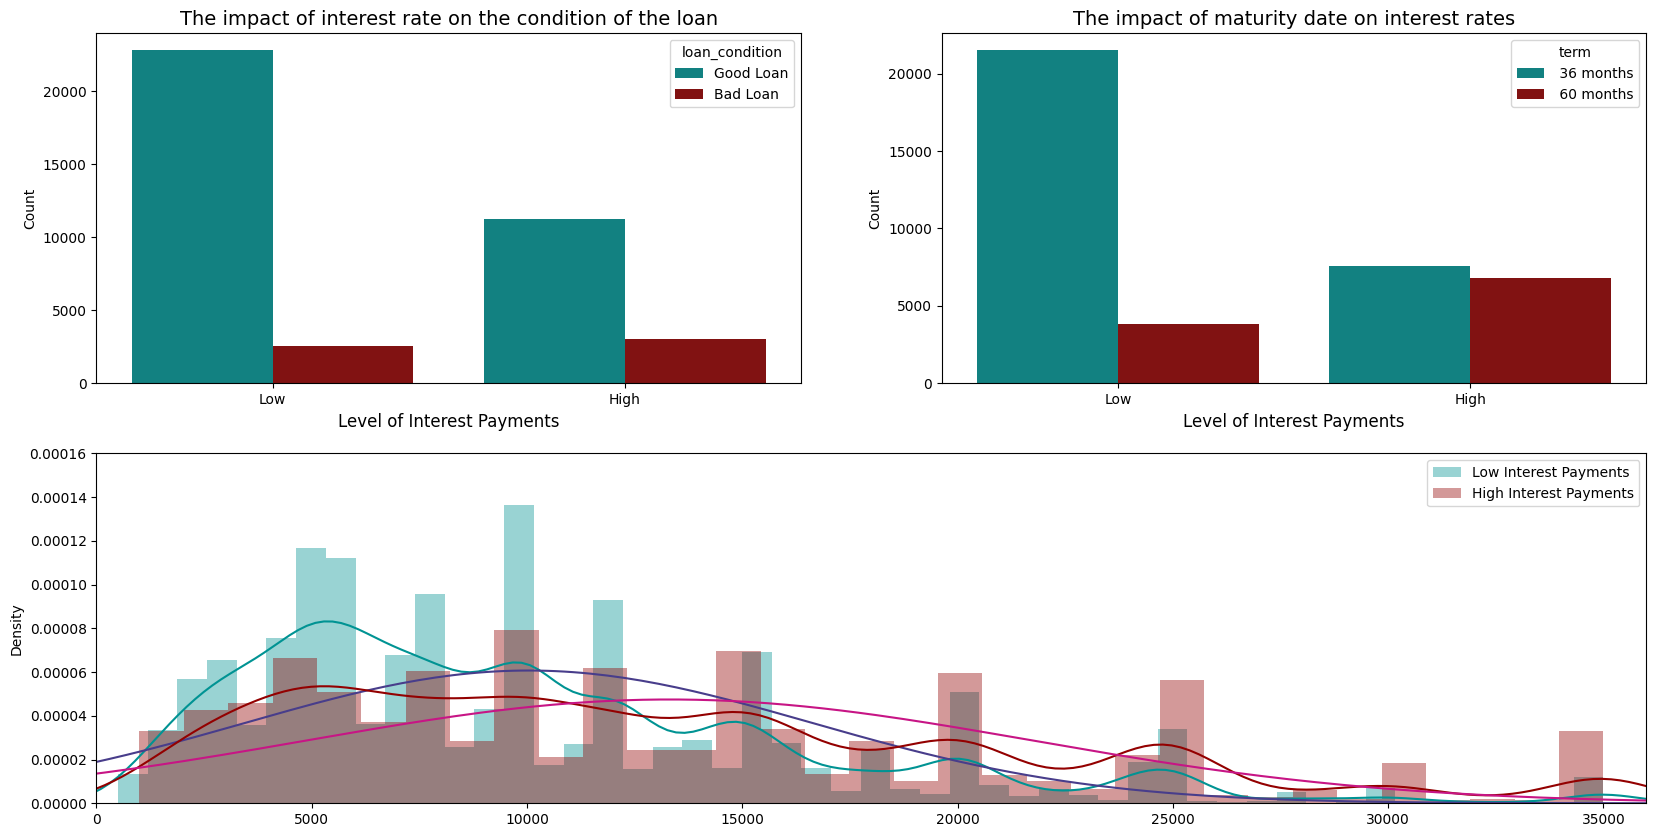

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
class Datavisualizer:
    def __init__(self, df):
        self.df = df
    
    def plot_average_loan_amount_by_year(self):
        # Check if necessary columns are present in the DataFrame
        required_columns = ['year', 'loan_amount']
        if all(col in self.df.columns for col in required_columns):
            plt.figure(figsize=(12, 8))

            # Use seaborn's barplot to visualize the average loan amount per year
            sns.barplot(x='year', y='loan_amount', data=self.df, palette='tab10')

            # Set plot title and axis labels
            plt.title('Issuance of Loans', fontsize=16)
            plt.xlabel('Year', fontsize=14)
            plt.ylabel('Average Loan Amount Issued', fontsize=14)

            # Show the plot
            plt.show()
        else:
            print("Error: Required columns ('year', 'loan_amount') not found in DataFrame.")
    def plot_loan_conditions(self):
        f, ax = plt.subplots(1, 2, figsize=(16, 8))
        colors = ["#3791D7", "#D72626"]
        labels = "Good Loans", "Bad Loans"
        plt.suptitle('Information on Loan Conditions', fontsize=20)
        required_columns = ['loan_condition', 'year', 'loan_amount']
        if all(col in self.df.columns for col in required_columns):

            self.df["loan_condition"].value_counts().plot.pie(explode=[0, 0.25], autopct='%1.2f%%', ax=ax[0],
                                                              shadow=True, colors=colors, labels=labels,
                                                              fontsize=12, startangle=70)
            ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
            palette = ["#3791D7", "#E01E1B"]
            sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=self.df, palette=palette,
                        estimator=lambda x: len(x) / len(self.df) * 100, ax=ax[1])
            ax[1].set_ylabel('(%)')

            plt.show()
        else:
            print("Error: Required columns ('loan_condition', 'year', 'loan_amount') not found in DataFrame.")
        
    def plot_loan_amount_over_time(self):
        required_columns = ['issue_year', 'region', 'loan_amount']
        if all(col in self.df.columns for col in required_columns):
            by_issued_amount = self.df.groupby(['issue_year', 'region'])['loan_amount'].sum()
            by_issued_amount.unstack().plot(kind='line', figsize=(15, 6))
            plt.title('Loans Issued by Region Over Time', fontsize=16)
            plt.xlabel('Year', fontsize=14)
            plt.ylabel('Total Loan Amount (in thousands)', fontsize=14)
            plt.legend(title='Region', title_fontsize='large', fontsize='medium', loc='upper left')
            plt.grid(False) 
            plt.show()
        else:
            print("Error: Required columns ('issue_year', 'region', 'loan_amount') not found in DataFrame.")
    
    def plot_loan_type_by_grade_and_subgrade(self):
        required_columns = ['grade', 'sub_grade', 'loan_condition']
        
        # Validate if all required columns are present in the DataFrame
        if all(col in self.df.columns for col in required_columns):
            fig = plt.figure(figsize=(16, 12))
            ax1 = fig.add_subplot(221)
            ax2 = fig.add_subplot(222)
            cmap = plt.cm.coolwarm_r
            loans_by_grade = self.df.groupby(['grade', 'loan_condition']).size()
            loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
            ax1.set_title('Type of Loans by Grade', fontsize=14)
            loans_by_subgrade = self.df.groupby(['sub_grade', 'loan_condition']).size()
            loans_by_subgrade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
            ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

            plt.tight_layout()
            plt.show()
        else:
            print("Error: Required columns ('grade', 'sub_grade', 'loan_condition') not found in DataFrame.")
    
    def plot_loan_and_interest_by_credit_score(self):
        # Check if necessary columns are present in the DataFrame
        required_columns = ['year', 'grade', 'loan_amount', 'interest_rate']
        if all(col in self.df.columns for col in required_columns):
            f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
            cmap = plt.cm.coolwarm

            # Group by 'year' and 'grade', then calculate mean loan amount and interest rate
            by_credit_score_loan = self.df.groupby(['year', 'grade'])['loan_amount'].mean().unstack()
            by_credit_score_loan.plot(legend=False, ax=ax1, colormap=cmap)
            ax1.set_title('Loans Issued by Credit Score', fontsize=14)

            by_credit_score_interest = self.df.groupby(['year', 'grade'])['interest_rate'].mean().unstack()
            by_credit_score_interest.plot(ax=ax2, colormap=cmap)
            ax2.set_title('Interest Rates by Credit Score', fontsize=14)

            # Adjust legend for better layout
            ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size': 12},
                       ncol=7, mode="expand", borderaxespad=0.)

            plt.show()
        else:
            print("Error: Required columns ('year', 'grade', 'loan_amount', 'interest_rate') not found in DataFrame.")

    def plot_loan_impact_analysis(self):
        # Calculate interest_payments based on interest_rate
        self.df['interest_payments'] = np.where(self.df['interest_rate'] <= 13.23, 'Low', 'High')

        # Plot 1 - Impact of interest rate on loan condition
        plt.figure(figsize=(20, 10))
        palette = ['#009393', '#930000']
        
        plt.subplot(221)
        ax = sns.countplot(x='interest_payments', data=self.df, palette=palette, hue='loan_condition')
        ax.set_title('The impact of interest rate on the condition of the loan', fontsize=14)
        ax.set_xlabel('Level of Interest Payments', fontsize=12)
        ax.set_ylabel('Count')

        # Plot 2 - Impact of maturity date on interest rates
        plt.subplot(222)
        ax1 = sns.countplot(x='interest_payments', data=self.df, palette=palette, hue='term')
        ax1.set_title('The impact of maturity date on interest rates', fontsize=14)
        ax1.set_xlabel('Level of Interest Payments', fontsize=12)
        ax1.set_ylabel('Count')

        # Plot 3 - Distribution of loan amount based on interest payments
        plt.subplot(212)
        low = self.df['loan_amount'].loc[self.df['interest_payments'] == 'Low'].values
        high = self.df['loan_amount'].loc[self.df['interest_payments'] == 'High'].values
        ax2 = sns.distplot(low, color='#009393', label='Low Interest Payments', fit=norm, fit_kws={"color": "#483d8b"})
        ax3 = sns.distplot(high, color='#930000', label='High Interest Payments', fit=norm, fit_kws={"color": "#c71585"})
        plt.axis([0, 36000, 0, 0.00016])
        plt.legend()

        plt.show()

    def plot_loan_analysis(self,df):
        fig = plt.figure(figsize=(16, 12))

        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)

        cmap = plt.cm.coolwarm_r

        # Plot 1: Type of Loans by Grade
        loans_by_region = df.groupby(['grade', 'loan_condition']).size()
        loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
        ax1.set_title('Type of Loans by Grade', fontsize=14)

        # Plot 2: Type of Loans by Sub-Grade
        loans_by_grade = df.groupby(['sub_grade', 'loan_condition']).size()
        loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
        ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

        # Plot 3: Average Interest rate by Loan Condition
        by_interest = df.groupby(['year', 'loan_condition'])['interest_rate'].mean()
        by_interest.unstack().plot(ax=ax3, colormap=cmap)
        ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
        ax3.set_ylabel('Interest Rate (%)', fontsize=12)

        plt.tight_layout()
        plt.show()
    def plot_condition_by_purpose(self):
        if 'purpose' not in self.df.columns:
            return "The 'purpose' column is not available in the dataframe."

        purpose_condition = round(pd.crosstab(self.df['loan_condition'], self.df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

        purpose_bad_loans = purpose_condition.values[0].tolist()
        purpose_good_loans = purpose_condition.values[1].tolist()
        purpose = purpose_condition.columns

        bad_plot = go.Bar(
            x=purpose,
            y=purpose_bad_loans,
            name = 'Bad Loans',
            text='%',
            marker=dict(
                color='rgba(219, 64, 82, 0.7)',
                line = dict(
                    color='rgba(219, 64, 82, 1.0)',
                    width=2
                )
            )
        )

        good_plot = go.Bar(
            x=purpose,
            y=purpose_good_loans,
            name='Good Loans',
            text='%',
            marker=dict(
                color='rgba(50, 171, 96, 0.7)',
                line = dict(
                    color='rgba(50, 171, 96, 1.0)',
                    width=2
                )
            )
        )

        data = [bad_plot, good_plot]

        layout = go.Layout(
            title='Condition of Loan by Purpose',
            xaxis=dict(
                title=''
            ),
            yaxis=dict(
                title='% of the Loan',
            ),
            paper_bgcolor='#FFF8DC',
            plot_bgcolor='#FFF8DC',
            showlegend=True
        )

        fig = dict(data=data, layout=layout)
        iplot(fig, filename='condition_purposes')



        



   
visualizer = Datavisualizer(df)
visualizer.plot_average_loan_amount_by_year()
visualizer.plot_loan_conditions()
visualizer.plot_loan_amount_over_time()
visualizer.plot_loan_type_by_grade_and_subgrade()
visualizer.plot_loan_and_interest_by_credit_score()
visualizer.plot_loan_impact_analysis()
#visualizer.plot_loan_analysis(df)
#visualizer.plot_condition_by_purpose()
